#Decision Tree

In [ ]:
import pandas as pd
from pandas import read_csv

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [ ]:
headernames = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
data = read_csv('/content/pima-indians-diabetes.csv', names=headernames)

In [ ]:
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = data[feature_cols] # Features
y = data.label # Target variable

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [ ]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)
result3 = roc_auc_score(y_test,y_pred)
print('AUC-ROC:',result3)

#   1  0
#. ------
# 1|v. x1
# 0|x2 v

Confusion Matrix:
[[112  34]
 [ 40  45]]
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.77      0.75       146
           1       0.57      0.53      0.55        85

    accuracy                           0.68       231
   macro avg       0.65      0.65      0.65       231
weighted avg       0.68      0.68      0.68       231

Accuracy: 0.6796536796536796
AUC-ROC: 0.6482675261885575


In [ ]:
pip install six

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


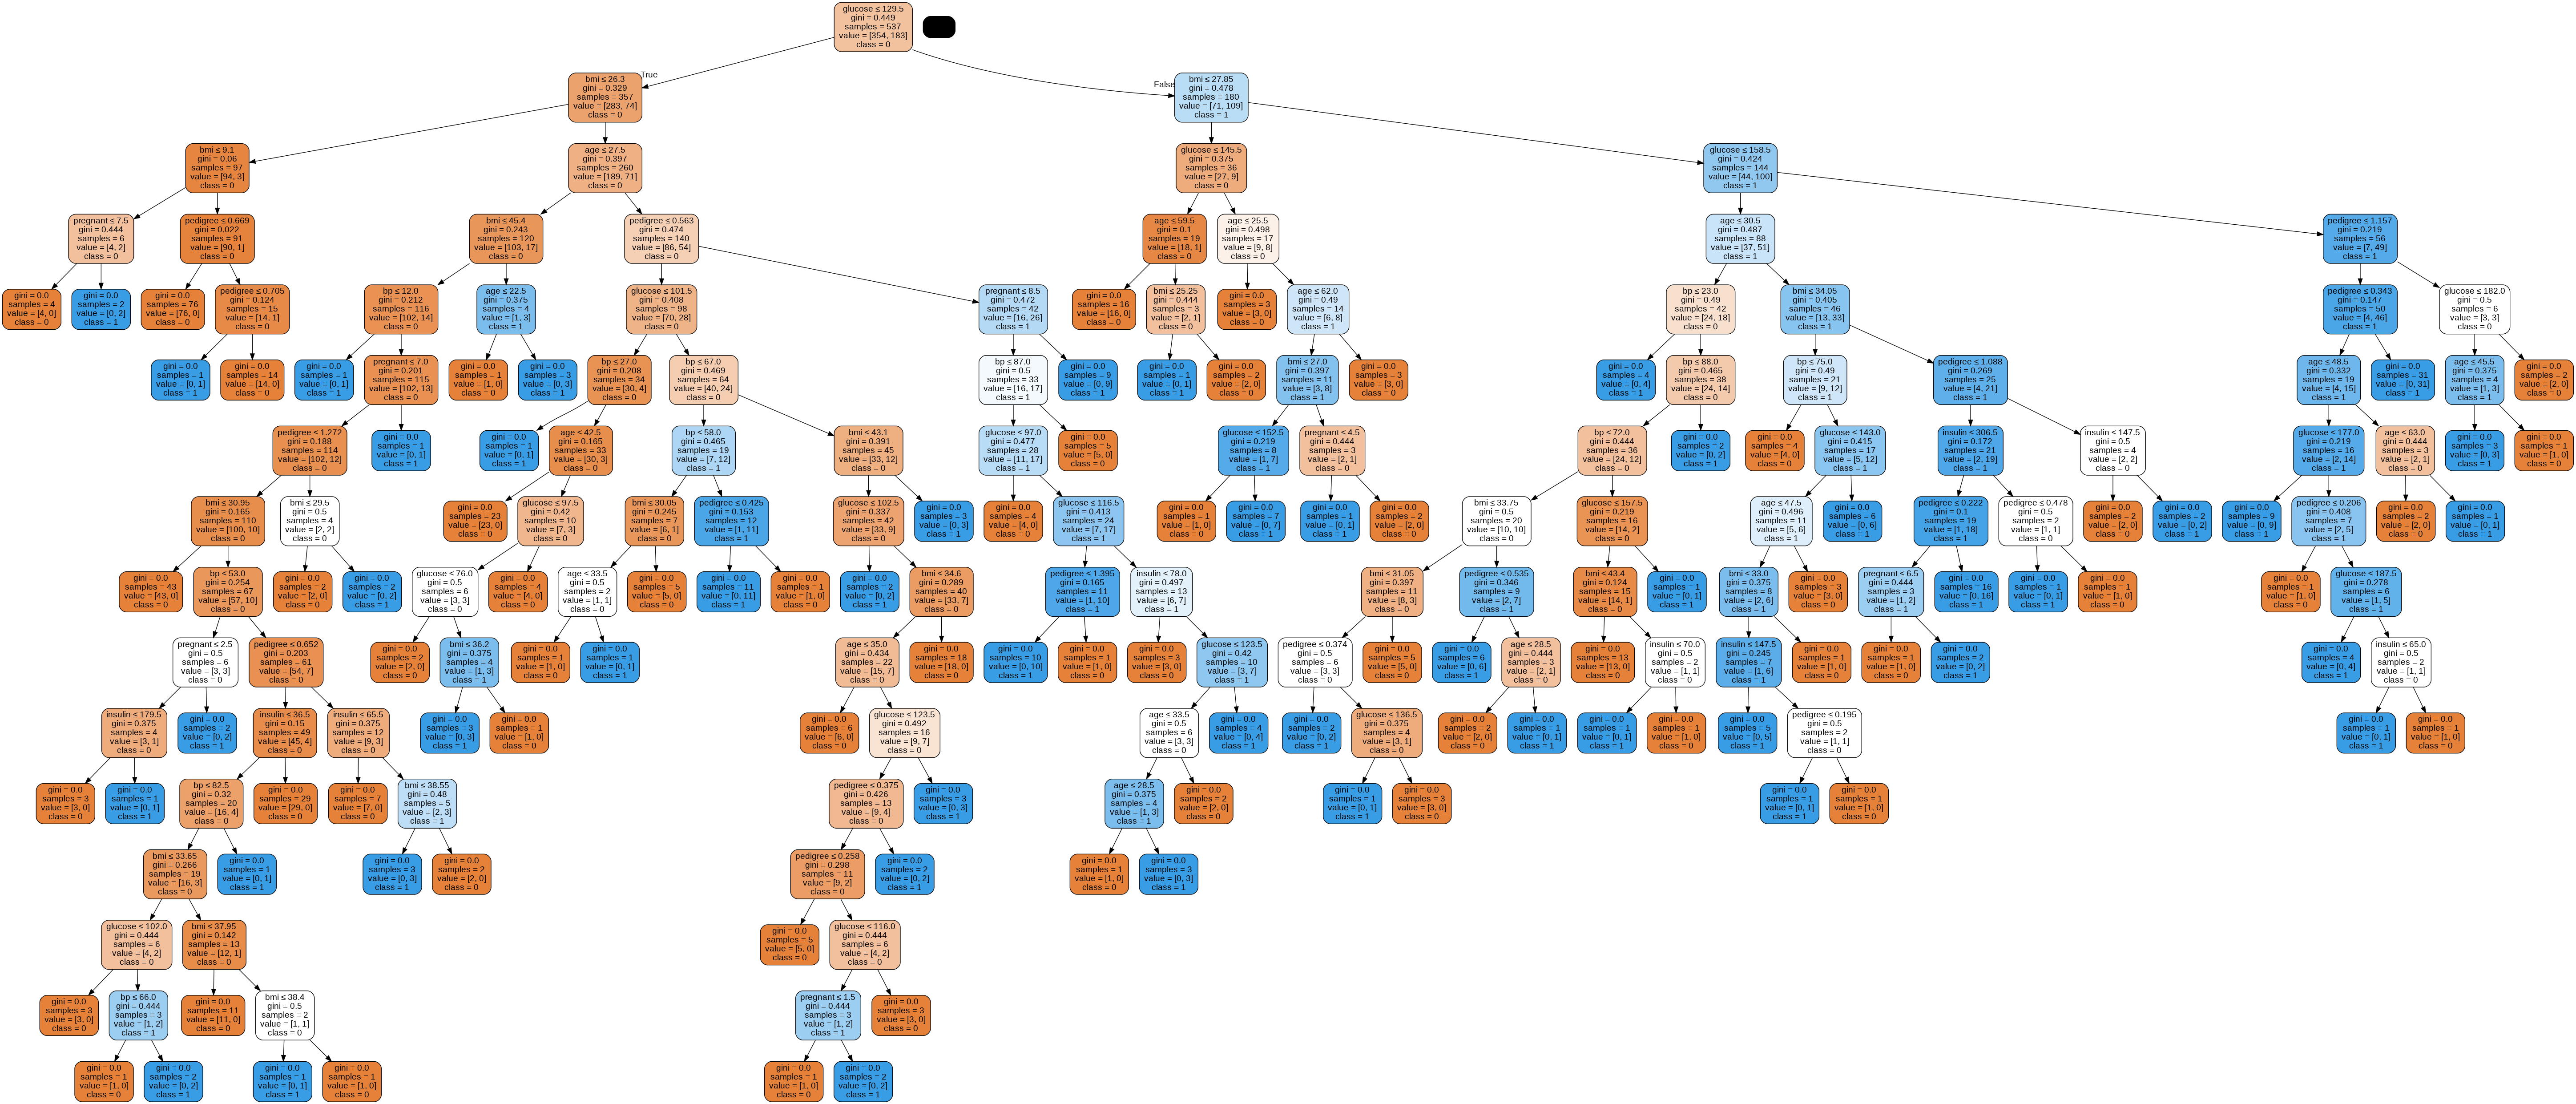

In [ ]:
from sklearn.tree import export_graphviz
from six import StringIO
#from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, filled=True, rounded=True,
   special_characters=True,feature_names = feature_cols,class_names=['0','1'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('Pima_diabetes_Tree.png')
Image(graph.create_png())

#Bayess

In [44]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB

# memuat dataset pima-indians-diabetes ke dalam memori
df = pd.read_csv("/content/pima-indians-diabetes.csv")


In [ ]:
# memisahkan fitur-fitur dan label
X = df.iloc[:, :8]
y = df.iloc[:, 8]


In [ ]:
# membuat objek GaussianNB
model = GaussianNB()
# membuat objek GaussianNB
model = GaussianNB()
# melakukan fitting model
model.fit(X, y)
# melakukan prediksi
y_pred = model.predict(X)


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

# menghitung metrik akurasi
accuracy = accuracy_score(y, y_pred)

# menghitung metrik presisi
precision = precision_score(y, y_pred)

# menghitung metrik recall
recall = recall_score(y, y_pred)

# menampilkan hasil evaluasi
print("Akurasi:", accuracy)
print("Presisi:", precision)
print("Recall:", recall)


Akurasi: 0.7627118644067796
Presisi: 0.6763485477178424
Recall: 0.6104868913857678


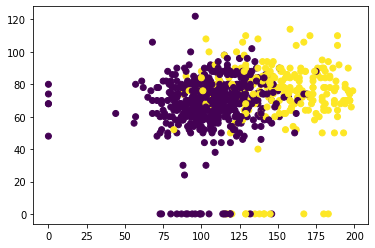

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# menampilkan visual dari hasil prediksi model
plt.scatter(X.iloc[:, 1], X.iloc[:, 2], c=y_pred)
plt.show()

#Discritization

In [ ]:
import pandas as pd
import numpy as np

# memuat dataset pima-indians-diabetes ke dalam memori
df = pd.read_csv("/content/pima-indians-diabetes.csv")


In [ ]:
# memilih fitur yang akan discritized
X = df.iloc[:, 1]
# melakukan discritization dengan menggunakan quantile
X_discritized = np.digitize(X, np.quantile(X, [0.25, 0.50, 0.75]))

# menampilkan hasil discritization
print(X_discritized)


[0 3 0 2 1 0 1 3 2 1 3 2 3 3 1 2 1 1 1 2 1 3 2 3 2 3 0 3 2 1 3 0 0 2 1 2 1
 0 1 3 2 1 3 3 3 3 0 1 1 1 1 0 3 3 0 3 1 3 1 0 2 0 3 1 1 1 1 0 3 1 2 2 2 0
 0 0 0 2 1 1 0 0 1 2 1 1 1 2 1 0 2 0 2 3 3 0 0 0 2 3 3 2 0 0 2 0 3 0 0 3 3
 0 0 3 3 2 0 0 1 3 1 1 2 1 0 2 2 2 1 3 2 3 0 0 2 1 0 2 1 2 1 1 1 3 1 0 1 3
 0 2 1 3 3 3 3 1 1 0 3 3 1 1 1 2 1 3 2 1 1 1 2 0 0 0 3 0 2 3 2 0 2 0 0 3 3
 3 2 1 2 1 2 3 2 0 3 1 1 1 3 1 2 1 1 1 1 3 3 0 3 0 3 3 3 1 3 1 2 0 1 3 3 2
 3 1 0 1 3 3 2 3 2 0 2 0 3 3 3 3 1 0 0 2 2 3 3 2 3 2 1 1 2 0 0 0 1 1 1 3 3
 3 3 0 3 2 0 2 2 1 3 1 1 2 0 1 1 1 1 1 1 3 2 2 3 1 2 3 2 0 1 0 1 2 2 3 3 3
 2 1 1 3 3 0 1 3 2 3 2 2 2 0 1 3 1 1 1 1 3 1 3 2 1 2 3 1 3 2 3 1 1 2 0 3 1
 0 3 2 1 3 3 2 0 0 2 0 2 2 1 1 0 0 2 0 0 0 3 2 2 0 3 3 3 1 3 3 1 2 1 0 2 3
 2 0 1 2 3 0 0 3 0 1 1 1 0 2 2 1 1 3 1 1 3 2 1 3 2 0 2 0 3 0 2 2 0 3 2 1 1
 3 3 1 1 3 3 2 3 0 3 0 2 2 0 1 1 3 3 0 3 2 0 1 0 0 2 0 3 3 3 0 1 3 0 2 1 2
 3 1 0 1 2 0 2 0 2 1 3 2 0 3 2 2 0 0 0 1 2 0 0 2 3 3 2 2 2 1 2 1 1 2 2 3 2
 0 0 3 2 2 3 1 3 0 0 1 2 

#Normalization

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# memuat dataset pima-indians-diabetes ke dalam memori
df = pd.read_csv("/content/pima-indians-diabetes.csv")
# memilih fitur yang akan d normalisasi
X = df.iloc[:, :8]


In [ ]:
# membuat objek StandardScaler
scaler = StandardScaler()

# melakukan normalisasi pada fitur
X_normalized = scaler.fit_transform(X)

# menampilkan hasil normalisasi
print(X_normalized)


[[-0.84372629 -1.12208597 -0.16024856 ... -0.68372895 -0.36426474
  -0.18894038]
 [ 1.23423997  1.94447577 -0.26357823 ... -1.10230105  0.60470064
  -0.1037951 ]
 [-0.84372629 -0.99692019 -0.16024856 ... -0.49346891 -0.91968415
  -1.0403932 ]
 ...
 [ 0.343683    0.0044061   0.14974046 ... -0.73446496 -0.68423462
  -0.27408566]
 [-0.84372629  0.16086333 -0.47023757 ... -0.23978884 -0.37030191
   1.17338414]
 [-0.84372629 -0.8717544   0.04641078 ... -0.20173684 -0.47293375
  -0.87010264]]


#Handle missing data

In [ ]:
import pandas as pd

# memuat dataset pima-indians-diabetes ke dalam memori
df = pd.read_csv("/content/pima-indians-diabetes.csv")


In [ ]:
# mengecek apakah terdapat missing data
df.isnull().sum()
# menghapus baris yang memiliki missing data
df_cleaned = df.dropna()
# menghapus baris yang memiliki missing data
df_cleaned = df.dropna()
# mengisi missing data dengan nilai median
df_cleaned = df.fillna(df.median())
# mengisi missing data dengan nilai mean
df_cleaned = df.fillna(df.mean())


In [ ]:
# menampilkan baris pertama dari dataframe yang sudah dihandle
df_cleaned.head()
# menampilkan informasi umum dari dataframe yang sudah dihandle
df_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   6       767 non-null    int64  
 1   148     767 non-null    int64  
 2   72      767 non-null    int64  
 3   35      767 non-null    int64  
 4   0       767 non-null    int64  
 5   33.6    767 non-null    float64
 6   0.627   767 non-null    float64
 7   50      767 non-null    int64  
 8   1       767 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


#Transformation

In [ ]:
import pandas as pd
import numpy as np

# memuat dataset pima-indians-diabetes ke dalam memori
df = pd.read_csv("/content/pima-indians-diabetes.csv")


In [ ]:
# memilih fitur yang akan ditransformasikan
X = df.iloc[:, 1]
# menggunakan fungsi logaritma
X_transformed = np.log(X)
# menggunakan fungsi akar
X_transformed = np.sqrt(X)
# menggunakan fungsi eksponensial
X_transformed = np.exp(X)

/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


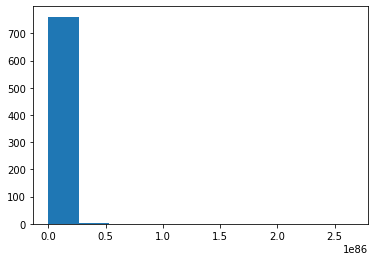

In [ ]:
import matplotlib.pyplot as plt
# menampilkan visual dari fitur yang sudah ditransformasikan
plt.hist(X_transformed)
plt.show()


#KNN2

In [38]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

# memuat dataset pima-indians-diabetes ke dalam memori
df = pd.read_csv("/content/pima-indians-diabetes.csv")


In [39]:
# memisahkan fitur-fitur dan label
X = df.iloc[:, :8]
y = df.iloc[:, 8]


In [42]:
# membuat objek KNN
model = KNeighborsClassifier(n_neighbors=5)
# melatih model
model.fit(X, y)
# melakukan prediksi
y_pred = model.predict(X)
# mencetak hasil prediksi ke layar
print(y_pred)


[0 1 0 1 0 0 0 1 0 0 1 0 1 1 0 1 0 0 0 1 0 1 1 1 0 1 0 0 0 1 1 0 0 1 0 0 1
 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 1 1 0 1 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1
 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0
 0 0 0 1 1 1 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1
 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 1 1 1 0
 0 0 0 0 1 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 1
 1 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 0 0 1
 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 1 0 0 1 0 1 0
 0 1 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 1 0 1 0 0 0 0 0 0 1 1
 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 1 1 1 0
 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0
 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0
 0 0 1 0 1 1 0 1 0 0 0 0 

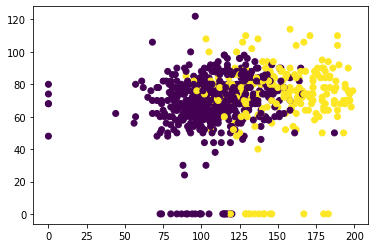

In [43]:
import matplotlib.pyplot as plt
# menampilkan visual dari hasil prediksi model
plt.scatter(X.iloc[:, 1], X.iloc[:, 2], c=y_pred)
plt.show()
